In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scanpy as sc
import mygene
import re

from scipy.stats import spearmanr, pearsonr

### CD8

In [2]:
master_dir = '../'
fluxes_cd8 = pd.read_excel(master_dir + 'output/Flux_analysis-per_cluster.xlsx', sheet_name='cd8')
fluxes_cd8.index = fluxes_cd8['Subsystem']
fluxes_cd8 = fluxes_cd8.drop(columns=['Subsystem'])
fluxes_cd8.head()

,cd8_0,cd8_1,cd8_2,cd8_3,cd8_4,cd8_5,cd8_6
Subsystem,,,,,,,
Alanine and aspartate metabolism,163.526616,163.060369,277.048556,118.181818,326.161899,344.940725,482.522342
Aminosugar metabolism,479.440538,454.092604,221.755580,439.925158,464.089093,375.562701,472.020301
Androgen and estrogen synthesis and metabolism,157.608972,121.739130,113.043478,108.695652,104.347826,156.509319,148.258137
Arachidonic acid metabolism,90.856913,90.844761,69.161097,73.264135,75.399271,63.751167,106.534780
Arginine and proline metabolism,351.491194,325.958654,336.079329,367.381558,438.207854,402.594352,399.242350


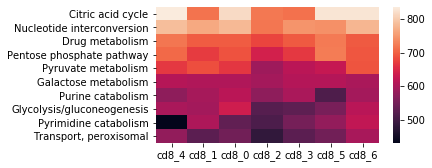

In [22]:
intensities = np.array(np.mean(fluxes_cd8, axis=1))
fluxes_cd8['mean'] = intensities
fluxes_cd8 = fluxes_cd8.sort_values(by='mean', ascending=False)
fluxes_cd8 = fluxes_cd8.drop(columns='mean')

fig = plt.figure(figsize=(5, 2.5))
fig = sns.heatmap(fluxes_cd8.head(10).iloc[:, [4, 1, 0, 2, 3, 5, 6]])
fig = plt.ylabel('')

### CD4

In [4]:
fluxes_cd4 = pd.read_excel(master_dir + 'output/Flux_analysis-per_cluster.xlsx', sheet_name='cd4')
fluxes_cd4.index = fluxes_cd4['Subsystem']
fluxes_cd4 = fluxes_cd4.drop(columns=['Subsystem'])
fluxes_cd4.head()

,cd4_0,cd4_1,cd4_2,cd4_3,cd4_4,cd4_5,cd4_6,cd4_7
Subsystem,,,,,,,,
Alanine and aspartate metabolism,165.308344,164.380622,329.351750,118.181818,153.804766,151.751626,471.355105,259.510357
Aminosugar metabolism,463.454342,451.467845,388.320830,304.606584,431.198465,412.752655,458.164533,465.408072
Androgen and estrogen synthesis and metabolism,91.304348,82.608696,82.608696,86.956522,156.850642,99.629761,135.459142,113.043478
Arachidonic acid metabolism,91.074926,110.715733,73.372890,86.040772,87.990445,88.405161,105.607989,111.727864
Arginine and proline metabolism,312.498712,320.982871,282.885569,247.510513,305.009292,395.824113,403.806555,401.687346


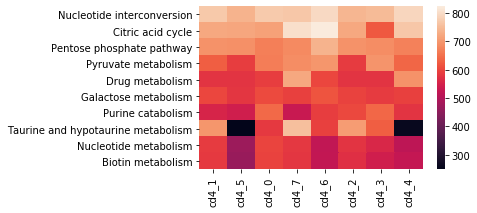

In [24]:
intensities = np.array(np.mean(fluxes_cd4, axis=1))
fluxes_cd4['mean'] = intensities
fluxes_cd4 = fluxes_cd4.sort_values(by='mean', ascending=False)
fluxes_cd4 = fluxes_cd4.drop(columns='mean')

fig = plt.figure(figsize=(5, 3))
fig = sns.heatmap(fluxes_cd4.head(10).iloc[:, [1, 5, 0, 7, 6, 2, 3, 4]])
fig = plt.ylabel('')

### B

In [6]:
fluxes_B = pd.read_excel(master_dir + 'output/Flux_analysis-per_cluster.xlsx', sheet_name='B')
fluxes_B.index = fluxes_B['Subsystem']
fluxes_B = fluxes_B.drop(columns=['Subsystem'])
fluxes_B.head()

,Bcell_0,Bcell_1,Bcell_2,Bcell_3,Bcell_4,Bcell_5,Bcell_6
Subsystem,,,,,,,
Alanine and aspartate metabolism,330.260826,154.057461,174.983359,577.258582,153.129114,324.495167,62.629507
Aminosugar metabolism,475.800191,441.354321,365.822245,465.440788,431.834992,394.483195,229.169121
Androgen and estrogen synthesis and metabolism,117.391304,86.956522,82.608696,82.608696,156.934541,86.956522,117.391304
Arachidonic acid metabolism,109.822427,102.374839,96.195690,77.075646,106.336684,104.904739,53.502366
Arginine and proline metabolism,346.092708,359.290873,388.892919,406.259229,300.955997,339.847499,243.260664


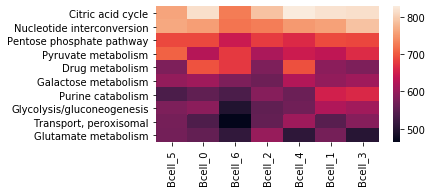

In [25]:
intensities = np.array(np.mean(fluxes_B, axis=1))
fluxes_B['mean'] = intensities
fluxes_B = fluxes_B.sort_values(by='mean', ascending=False)
fluxes_B = fluxes_B.drop(columns='mean')

fig = plt.figure(figsize=(5, 2.5))
fig = sns.heatmap(fluxes_B.head(10).iloc[:, [5, 0, 6, 2, 4, 1, 3]])
fig = plt.ylabel('')

### NK

In [8]:
fluxes_NK = pd.read_excel(master_dir + 'output/Flux_analysis-per_cluster.xlsx', sheet_name='NK')
fluxes_NK.index = fluxes_NK['Subsystem']
fluxes_NK = fluxes_NK.drop(columns=['Subsystem'])
fluxes_NK.head()

,NKcell_0,NKcell_1,NKcell_2,NKcell_3,NKcell_4,NKcell_5
Subsystem,,,,,,
Alanine and aspartate metabolism,154.937522,118.181818,245.304961,159.432797,325.972267,324.478866
Aminosugar metabolism,403.796821,385.260474,436.376370,330.888186,465.347740,434.666824
Androgen and estrogen synthesis and metabolism,165.381162,156.950880,152.381874,130.434783,157.363579,156.193323
Arachidonic acid metabolism,89.443096,64.019893,69.382665,56.367932,88.828563,79.814229
Arginine and proline metabolism,335.078075,309.389645,325.984754,285.294118,341.524121,349.157799


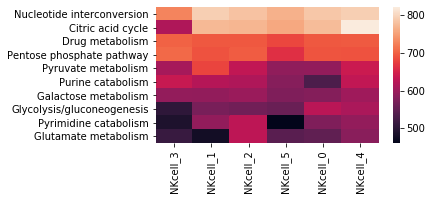

In [26]:
intensities = np.array(np.mean(fluxes_NK, axis=1))
fluxes_NK['mean'] = intensities
fluxes_NK = fluxes_NK.sort_values(by='mean', ascending=False)
fluxes_NK = fluxes_NK.drop(columns='mean')

fig = plt.figure(figsize=(5, 2.5))
fig = sns.heatmap(fluxes_NK.head(10).iloc[:, [3, 1, 2, 5, 0, 4]])
fig = plt.ylabel('')

### Monocyte

In [10]:
fluxes_Monocyte = pd.read_excel(master_dir + 'output/Flux_analysis-per_cluster.xlsx', sheet_name='Monocytes')
fluxes_Monocyte.index = fluxes_Monocyte['Subsystem']
fluxes_Monocyte = fluxes_Monocyte.drop(columns=['Subsystem'])
fluxes_Monocyte.head()

,Monocyte_0,Monocyte_1,Monocyte_2,Monocyte_3,Monocyte_4,Monocyte_5,Monocyte_6,Monocyte_7,Monocyte_8
Subsystem,,,,,,,,,
Nucleotide interconversion,781.030618,746.999649,816.440342,794.583679,797.725325,799.052629,744.154232,796.959893,801.110584
Citric acid cycle,769.279499,778.971083,768.823023,821.856340,759.918711,768.716281,777.842721,772.941276,816.132746
Pyruvate metabolism,713.210167,585.425143,676.201227,654.451115,627.850513,689.279551,583.229966,688.668232,767.582765
Taurine and hypotaurine metabolism,695.219585,786.507393,710.865814,512.474044,581.247427,609.663165,760.721025,530.757168,716.610902
Pentose phosphate pathway,661.487358,639.800248,671.425861,690.811901,690.908779,659.640572,662.545081,690.110915,747.370225


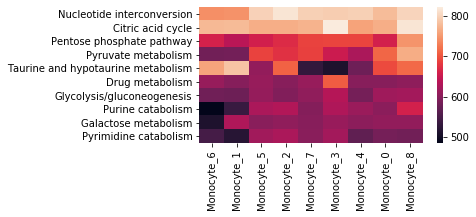

In [30]:
intensities = np.array(np.mean(fluxes_Monocyte, axis=1))
fluxes_Monocyte['mean'] = intensities
fluxes_Monocyte = fluxes_Monocyte.sort_values(by='mean', ascending=False)
fluxes_Monocyte = fluxes_Monocyte.drop(columns='mean')

fig = plt.figure(figsize=(5, 2.5))
fig = sns.heatmap(fluxes_Monocyte.head(10).iloc[:, [6, 1, 5, 2, 7, 3, 4, 0, 8]])
fig = plt.ylabel('')

## 

In [41]:
fluxes = sc.AnnData()
for df in [fluxes_cd8, fluxes_cd4, fluxes_B, fluxes_NK, fluxes_Monocyte]:
    temp = sc.AnnData(X = np.array(fluxes_cd8.transpose()))
    temp.obs['louvain_metab'] = df.columns
    temp.var_names = df.index
    fluxes = fluxes.concatenate(temp)
# Integrate all in one


AttributeError: 'NoneType' object has no attribute 'dtype'